# Lab2 Submission
## Graph 1: Weight and Price
This is a graphic shows the shifting price related to the corresponded weight.

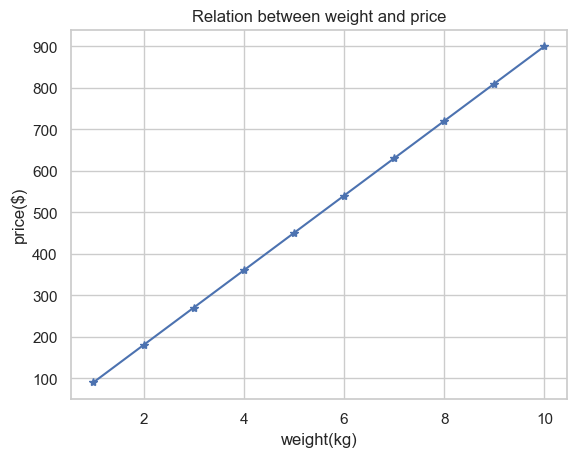

In [20]:
import matplotlib.pyplot as plt

unit_price = 90

x = [ x for x in range(1, 11) ]
y = [ unit_price * y for y in x ]
plt.plot(x, y,'-*')
plt.title('Relation between weight and price')
plt.xlabel('weight(kg)')
plt.ylabel('price($)')
plt.show()

## Graph 2: Temperature and berverages Sales volume
This is a graph shows the relation between temperature and berverages Sales volume.
The red point shows the prediction when temperature comes to 31 degree based on the 

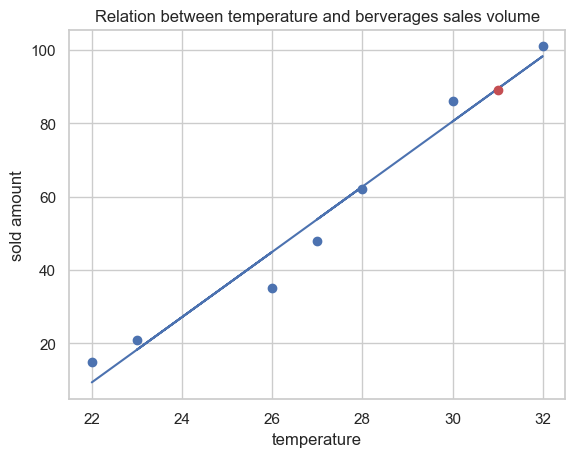

In [21]:
import matplotlib.pyplot as plt
from sympy import Symbol, solve
import numpy as np

x = np.array([22, 26, 23, 28, 27, 32, 30]) # Temperature
y = np.array([15, 35, 21, 62, 48, 101, 86]) # Beverages sales volume

a, b = np.polyfit(x, y, 1) # regression

y2 = a * x + b
plt.scatter(x, y) 
plt.plot(x, y2)   # draw the line

soldAmt = a * 31 + b
plt.plot(31, int(soldAmt), 'ro')

plt.xlabel('temperature')
plt.ylabel('sold amount')
plt.title('Relation between temperature and berverages sales volume')
plt.show()

## Graph 3: Body Mass Comparison by Species and Sex
This nested barplot compares the body mass of penguins across different species and sexes. Each bar represents the average body mass in grams, with error bars indicating the standard deviation. The x-axis shows the penguin species, while the y-axis represents body mass. The bars are further divided by sex, with different colors indicating male and female penguins.

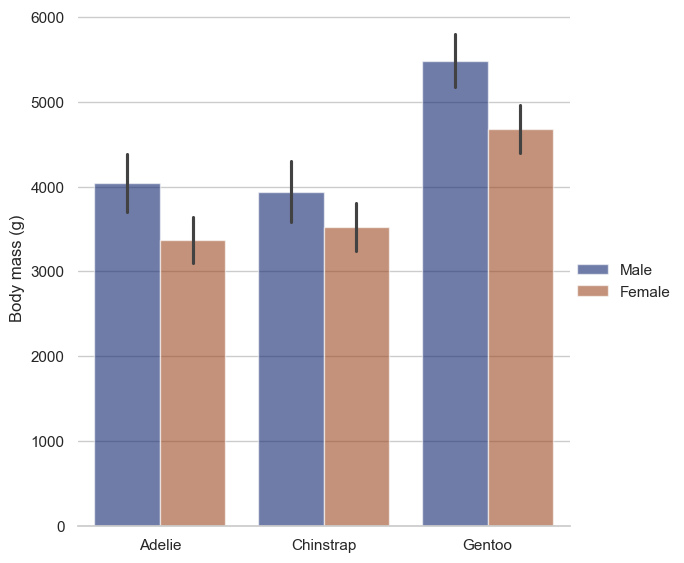

In [22]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

## Graph 4: Correlation between Brain Network Activities
This scatter plot visualizes the correlation between different brain network activities. Each point represents the correlation between two brain networks, with the x-axis and y-axis indicating the network indices. The size and color of each point reflect the strength of correlation, with larger and darker points indicating higher correlation values. The plot provides insights into the relationships between various brain networks and their activities.

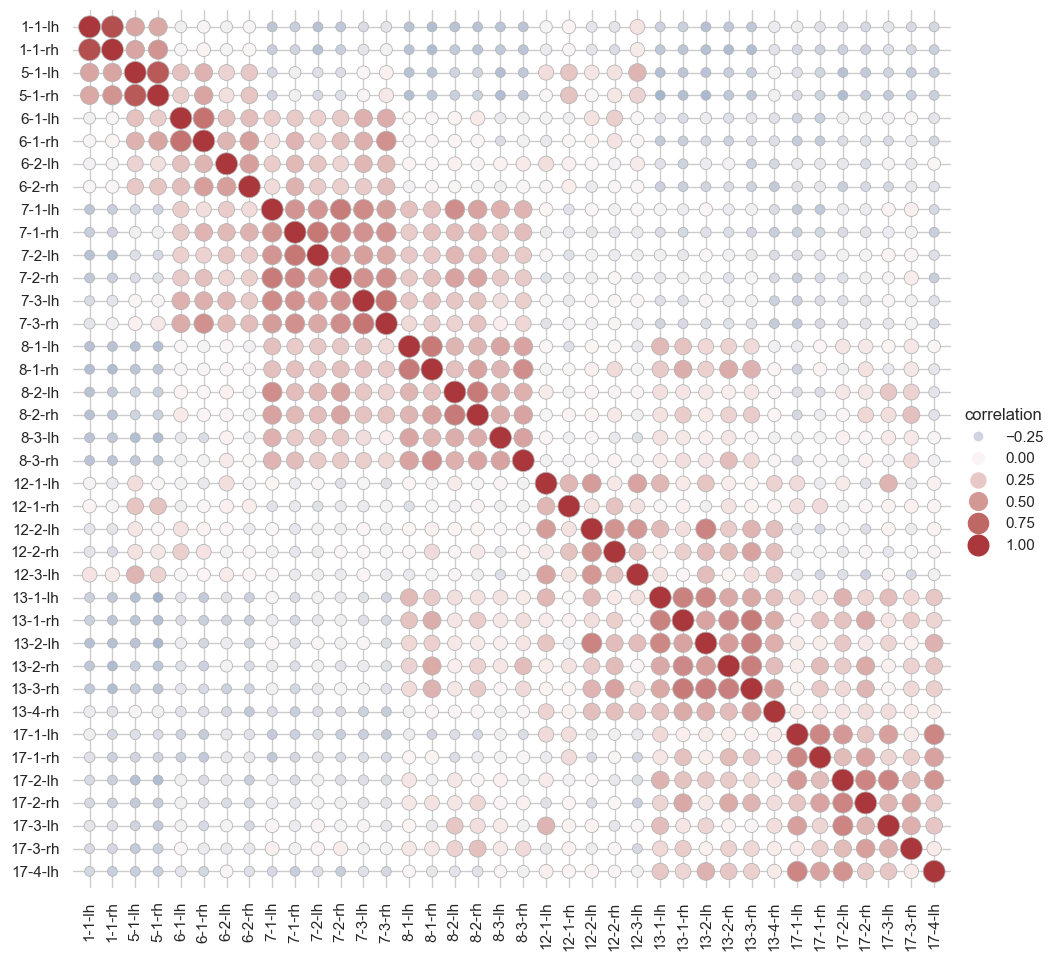

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)